In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Trabajo final:
# Ec. diferenciales asociadas a las órbitas de los planetas.

Las ley de la gravitación universal junto con las leyes de Newton, nos permiten entender como es la fuerza que actua sobre dos cuerpos afectados por la gravedad, y como esa fuerza afecta al movimiento. 

En nuestro trabajo nos centraremos en el sistema solar, y utilizaremos la Ley de la Gravitación Universal para crear un sistema de ecuaciones diferenciales que nos permita entender el movimiento y las órbitas de los planetas al rededor del Sol.

# 1) Desarrollo del sistema de ecuaciones diferenciales.

Sea:

$$M:= \textrm{\it{Masa del Sol}}$$
$$m:= \textrm{\it{Masa de un planeta}}$$
$$r:= \textrm{\it{Distancia entre el Sol y el planeta}}$$

El módulo de la fuerza que actúa sobre los dos cuerpos es:

$$ F = -G \cdot \dfrac{Mm}{r^{2}} $$

En nuestro caso asumiremos que el Sol está inmovil en el sistema, ya que al ser mucho más masivo, tal fuerza afectará mucho menos a su movimiento, haciéndolo despreciable. Así que estudiaremos solo la fuerza gravitatoria que ejerce el Sol sobre el planeta. Situaremos el origen de los ejes coordenados en el Sol, por lo que $r$ quedaría definido como:

$$ r = \sqrt{x^2 + y^2}$$

La fuerza que experimenta el planeta tiene sentido y dirección hacia el Sol.

Haciendo uso de la segunda Ley de Newton, llegamos a esta expresión de la aceleración:

$$ m \cdot a =  -G \cdot \dfrac{Mm}{r^{2}}$$
$$  a =  -G \cdot \dfrac{M}{r^{2}}$$

Si descomponemos la aceleración en sus dos componentes nos queda: 

$$  a_{x} =  -G \cdot \dfrac{M}{r^{2}} \cdot cos(\alpha)$$
$$  a_{y} =  -G \cdot \dfrac{M}{r^{2}} \cdot sen(\alpha)$$

Aplicando que: 

$$  x =  r \cdot cos(\alpha)$$
$$  y =  r \cdot sen(\alpha)$$

Llegamos a:

$$  a_{x} =  -G \cdot M \cdot \dfrac{x}{r^{3}}$$
$$  a_{y} =  -G \cdot M \cdot \dfrac{y}{r^{3}}$$

Teniendo en cuenta que la aceleración es la segunda derivada de la posición, llegamos al sistema de ecuaciones diferenciales de segundo orden siguiente:

$$ \begin{cases} x'' =  -G \cdot M \cdot \dfrac{x}{r^{3}} \\ y'' =  -G \cdot M \cdot \dfrac{y}{r^{3}} \end{cases} $$

Para poder aplicar el algoritmo de Runge-Kutta necesitamos un sistema de ecuaciones diferenciales de primer orden, por lo que obtendremos el siguiente sistema equivalente.

$$ \begin{cases} x' =  v_{x} \\ v_{x}' =  -G \cdot M \cdot \dfrac{x}{r^{3}} \\ y' =  v_{y} \\ v_{y}' = -G \cdot M \cdot \dfrac{y}{r^{3}} \end{cases}$$$$

Una vez obtenido nuestro sistema de ecuaciones de orden 1, podemos definir la función asociada al sistema:

In [2]:
G=6.672*(10**-11) #Constante de la gravitación universal
M=1.989*(10**30) #Masa del Sol

#Función asociada al sistema de ecuaciones diferenciales
def f(t,x,y,vx,vy):   
    return [vx, -(x*G*M)/(m.sqrt(x**2+y**2))**3, vy, -(y*G*M)/(np.sqrt(x**2+y**2))**3]

Y ahora definimos una función que aplique el algoritmo de Runge-Kutta:

In [3]:
def rk(f,p0,t):
    niter=len(t)-1
    h=t[1]-t[0]
    
    x=np.empty(niter+1)
    vx=np.empty(niter+1)
    y=np.empty(niter+1)
    vy=np.empty(niter+1)
    x[0]=p0[0]
    y[0]=p0[1]
    vx[0]=p0[2]
    vy[0]=p0[3]
    
    
    for n in range(niter):

        C1=f(t[n],x[n],y[n],vx[n],vy[n])
        
        k1=h*(C1[0])
        l1=h*(C1[1])
        q1=h*(C1[2])
        m1=h*(C1[3])

        C2=f(t[n]+h/2,x[n]+k1/2,y[n]+q1/2,vx[n]+l1/2,vy[n]+m1/2)
        k2=h*(C2[0])
        l2=h*(C2[1])
        q2=h*(C2[2])
        m2=h*(C2[3])

        C3=f(t[n]+h/2,x[n]+k2/2,y[n]+q2/2,vx[n]+l2/2,vy[n]+m2/2)
        k3=h*(C3[0])
        l3=h*(C3[1])
        q3=h*(C3[2])
        m3=h*(C3[3])

        C4=f(t[n]+h,x[n]+k3,y[n]+q3,vx[n]+l3,vy[n]+m3)
        k4=h*(C4[0])
        l4=h*(C4[1])
        q4=h*(C4[2])
        m4=h*(C4[3])
        
        x[n+1]=x[n]+1/6*(k1+2*k2+2*k3+k4)
        vx[n+1]=vx[n]+1/6*(l1+2*l2+2*l3+l4)
        y[n+1]=y[n]+1/6*(q1+2*q2+2*q3+q4)
        vy[n+1]=vy[n]+1/6*(m1+2*m2+2*m3+m4)
        
    return [x, y, vx, vy]

# 2) Aplicaciones y ejemplos de las soluciones del PVI planteado.


---------------------------
## Problema 1

Simular la orbita terrestre a partir de los siguientes datos:

    - Longitud del semieje mayor
	- Excentricidad
	- Argumento del periastro
$\newline$
A partir de estos datos podemos obtener una posición y velocidad inicial del planeta en su afelio.
1. Graficar el modulo de la velocidad y el modulo del vector posición
2. Estudiar la velocidad en el afelio y perihelio (ver que la velocidad en el perihelio es máxima)
3. Graficar theta(angulo del vector posición) y comprobar la duración de la órbita (365 días en el caso de la Tierra)

-----------------------------------------------------------------------------------------------------------------------

Ahora definiremos la función que calculará los valores iniciales a partir de la longitud del semieje mayor, la excentricidad y el argumento de periastro de un planeta que orbita al rededor del Sol, sopondremos que el movimiento es antihorario, que es el caso de todos los plantetas del sistema solar.

In [4]:
def estado_inicial(u, e, theta):
    """  
     u := Longitud del semieje mayor medido en unidades astronómicas (UA)
     e := Excentricidad de la órbita
     theta := Argumento del periastro

     A partir de las tres variables asociadas a un planeta, la función calcula los valores de posición y velocidad en su afelio,
     lo cual nos proporciona valores inicales para nuestro problema de valores iniciales.

     La función devuelve un vector que contiene:
     
     1-> x0: Componente x de la posición inicial
     2-> y0: Componente y de la posición inicial
     3-> v0_x: Componente x de la velocidad inicial
     4-> v0_y: Componente y de la velocidad inicial
    """    
    G=6.672*(10**-11) #Constante de la gravitación universal
    M=1.989*(10**30) #Masa del Sol
    
    sol = np.empty(4) #Creamos el vector que contendrá los cuatro valores iniciales (posición y velocidad)
    
    alpha = (theta - 180) * 2 * np.pi / 360 #Calculamos alpha, que será el argumento del apoastro o afelio
    a = u * 149597870700 #Longitud del semieje mayor medido en metros
    dist_afelio=a*(1+e) #Longitud del vector posición en el afelio
    v = np.sqrt(G * M / a * (1 - e) / (1 + e)) #Módulo del vector velocidad en su afelio
    
    sol[0] = np.cos(alpha)*dist_afelio #x0
    sol[1] = np.sin(alpha)*dist_afelio #y0
    sol[2] = v * np.cos(np.pi / 2 + alpha) #v0_x
    sol[3] = v * np.sin(np.pi / 2 + alpha) #v0_y
    return sol

### Aplicación del algoritmo al planeta Tierra

Conocemos los siguientes datos:
$$ a = 1 \textrm{\it{ UA}} $$
$$ \epsilon = 0.0167 $$
$$ \theta = 114.20783º$$

Luego podemos obtener los valores iniciales y aplicar Runge-Kutta para obtener las funciones de posición y velocidad del planeta Tierra:

In [5]:
u=1
epsilon=0.0167
theta=114.20783

estado_inicial_tierra = estado_inicial(u, epsilon, theta)

Tf_dias=365 # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 10000)
t_dias=t/(24*3600)

mov_tierra = rk(f, estado_inicial_tierra, t)

In [16]:
mov_tierra2[0][2500]/10000000000,mov_tierra2[1][2500]/10000000000


(0.514345860857525, 14.955362415477216)

In [17]:
(365*24*3600)/10000

3153.6

In [20]:
10000-(15*24*3600+5*3600+8*60)/3153.6

9583.18112633181

In [ ]:
particiones-(15*24*3600+5*3600+8*60)/

In [13]:
u=1
epsilon=0.0167
theta=180

estado_inicial_tierra = estado_inicial(u, epsilon, theta)

Tf_dias=365 # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 10000)
t_dias=t/(24*3600)

mov_tierra2 = rk(f, estado_inicial_tierra, t)

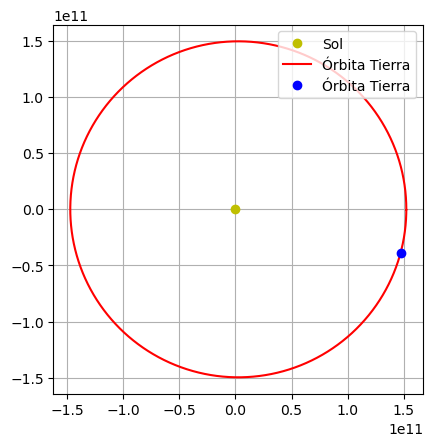

In [25]:
plt.grid()
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(mov_tierra2[0],mov_tierra2[1],'-r',label="Órbita Tierra")
plt.plot(mov_tierra2[0][9583],mov_tierra2[1][9583],'ob',label="Órbita Tierra")
plt.legend(loc='upper right')

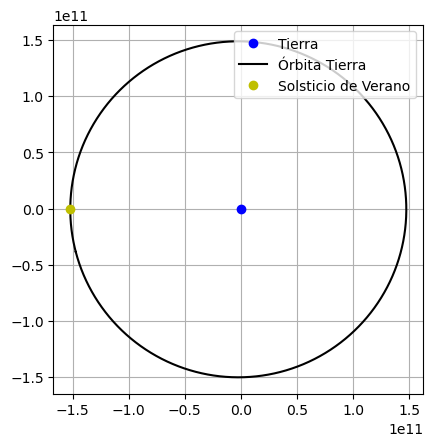

In [127]:
sols_long=np.sqrt(mov_tierra2[0][9583]**2+mov_tierra2[1][9583]**2)
lado=mov_tierra2[0][9583]
ang_rot=-m.atan(mov_tierra2[1][9583]/mov_tierra2[0][9583])

i=0
v_p=[]
while i<len(mov_tierra2[0]):
    an=np.array([[mov_tierra2[0][i]],[mov_tierra2[1][i]]])
    v_p.append(an)
    i=i+1

M_giro=np.array([[np.cos(ang_rot),-np.sin(ang_rot)],[np.sin(ang_rot),np.cos(ang_rot)]])
pos=[np.dot(M_giro,x) for x in v_p]
n_x=[x[0] for x in pos]
np.concatenate(n_x,axis=None)
n_y=[x[1] for x in pos]
vector_x=np.concatenate(n_x,axis=None)
vector_y=np.concatenate(n_y,axis=None)



long_2=np.sqrt(vector_x[0]**2+vector_y[0]**2)
long_2,sols_long,np.sqrt(mov_tierra2[0][1]**2+mov_tierra2[1][1]**2)
vector_y[9583]

x_sol=(-1)*vector_x
y_sol=(-1)*vector_y

plt.grid()
plt.gca().set_aspect('equal')
plt.plot(0,0,'bo',label='Tierra')
plt.plot(x_sol,y_sol,'-k',label="Órbita del Sol")
plt.plot(x_sol[9583],y_sol[9583],'oy',label="Solsticio de Verano")
plt.legend(loc='upper right')






In [24]:
a=np.array([1,2,3])
np.linalg.norm(a)

3.7416573867739413

In [22]:
[1,2,3]+[3,4,5]


[1, 2, 3, 3, 4, 5]

In [132]:
oblicuidad=(23.44*2*np.pi)/360

Matriz_giro3D=np.array([[np.cos(oblicuidad),0,np.sin(oblicuidad)],[0,1,0],[-np.sin(oblicuidad),0,np.cos(oblicuidad)]])

i=0
v_p2=[]
while i<len(x_sol):
    an=np.array([[x_sol[i]],[y_sol[i]],[0]])
    v_p2.append(an)
    i=i+1

pos2=[np.dot(Matriz_giro3D,x) for x in v_p2]
n_x2=[x[0] for x in pos2]
n_y2=[x[1] for x in pos2]
n_z2=[x[2] for x in pos2]
x_sol_3D=np.concatenate(n_x2,axis=None)
y_sol_3D=np.concatenate(n_y2,axis=None)
z_sol_3D=np.concatenate(n_z2,axis=None)

-139466839193.81277

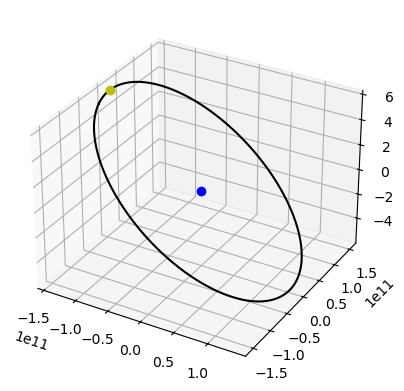

In [135]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(x_sol_3D, y_sol_3D, z_sol_3D, '-k',label="Órbita del Sol")
ax.plot3D(0, 0, 0, 'ob',label="Tierra")
ax.plot3D(x_sol_3D[9583],y_sol_3D[9583],z_sol_3D[9583],'oy',label="Solsticio de Verano")
x_sol_3D[9583]

In [23]:
5%2

1

### Órbita del Planeta Tierra

Para representar la órbita, graficaremos la función $x(t)$ e $y(t)$ en el plano:

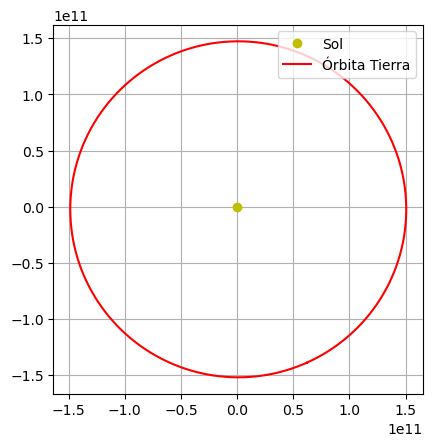

In [7]:
plt.grid()
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(mov_tierra[0],mov_tierra[1],'-r',label="Órbita Tierra")
plt.legend(loc='upper right')

### Gráfica de las componentes de la posición

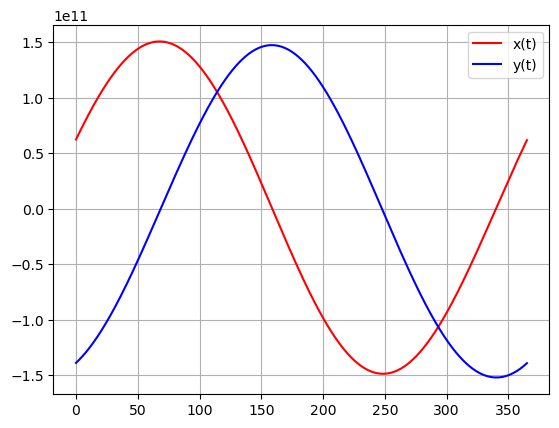

In [14]:
plt.grid()
plt.plot(t_dias,mov_tierra[0],'-r',label="x(t)")
plt.plot(t_dias,mov_tierra[1],'-b',label="y(t)")
plt.legend(loc='upper right')

### Gráfica de las componentes de la velocidad

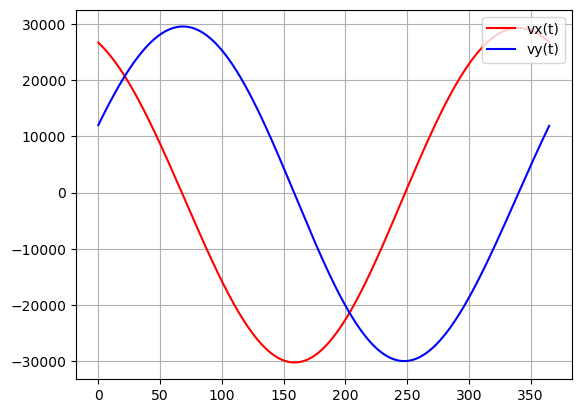

In [16]:
plt.grid()
plt.plot(t_dias,mov_tierra[2],'-r',label="vx(t)")
plt.plot(t_dias,mov_tierra[3],'-b',label="vy(t)")
plt.legend(loc='upper right')

### Módulo del vector posición y velocidad

En las gráficas podemos observar como cuando el módulo de la posición es mínimo (perihelio), la velocidad es máxima, y que cuando el planeta Tierra se encuentra en su afelio, la velocidad es mínima. Esto entra en concordancia con las leyes de Kepler, ya que los planetas barren en sus órbitas áreas iguales en tiempos iguales.

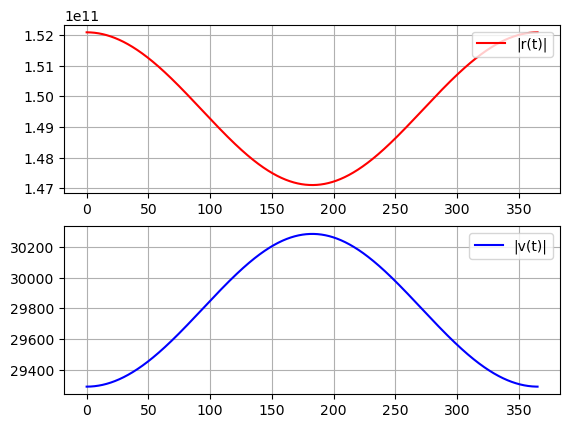

In [24]:
mod_r=np.sqrt((mov_tierra[0])**2+(mov_tierra[1])**2)
mod_v=np.sqrt((mov_tierra[2])**2+(mov_tierra[3])**2)

plt.subplot(211)
plt.grid()
plt.plot(t_dias,mod_r,'-r',label="|r(t)|")
plt.legend(loc='upper right')

plt.subplot(212)
plt.grid()
plt.plot(t_dias,mod_v,'-b',label="|v(t)|")
plt.legend(loc='upper right')

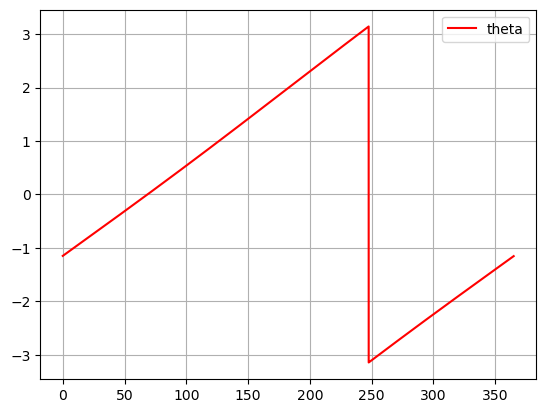

In [35]:
n=len(t)
theta_tierra=np.empty(n)

for i in range(0,n):
    theta_tierra[i]=m.atan2(mov_tierra[1][i],mov_tierra[0][i])



plt.grid()
plt.plot(t_dias,theta_tierra,'-r',label="theta")
plt.legend(loc='upper right')

## Problema 2

Buscar posiciones y velocidades iniciales para órbitas de distintos tipos (distintas cónicas).

## Problema 3

Representrar el sistema solar (Sol y planetas) con los siguientes datos:
$\newline$
    - Longitud del semieje mayor
$\newline$    
    - Excentricidad
$\newline$	
    - Argumento del periastro

## Problema 4

Intentar representar la órbita del cometa Halley desde la ultima vez que fue visible y deducir cuando volverá a serlo

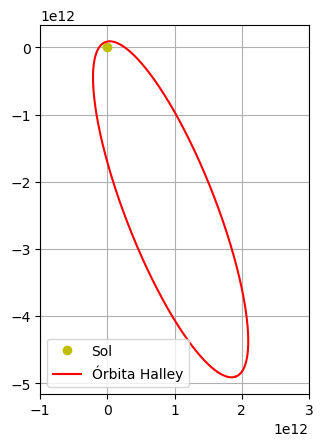

In [23]:
u=17.857619
epsilon=0.967990
theta=111.33249

estado_inicial_halley = estado_inicial(u, epsilon, theta)

Tf_dias=365*75 # 75 años
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 10000)

mov_halley = rk(f, estado_inicial_halley, t)

plt.grid()
plt.xlim((-1*(10**12), 3*(10**12))) 
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(mov_halley[0],mov_halley[1],'-r',label="Órbita Halley")
plt.legend(loc='lower left')

-138683534660.36505

In [33]:
theta_tierra

-1.1527101287553052